In [1]:
import os
os.chdir("..")
!pwd
!pyenv version
%load_ext autoreload
%autoreload 2

/Users/loicmorel/code/projetcs/crypto_assistant
crypto_assistant (set by PYENV_VERSION environment variable)


In [3]:
import pandas as pd
import numpy as np
from app.data_mgt.datamgt import ohlcv_from_csv_to_df
from tqdm import trange
from scipy import stats
from sklearn.linear_model import LinearRegression

In [11]:
file = 'data/ohlcv_BTCUSDT_1h_from_1589122800000_to_1652256000000.csv'
data = ohlcv_from_csv_to_df(file)
data

,o_ts,Open,High,Low,Close,Volume,c_ts,o_date
0,2020-05-10 15:00:00,8659.81,8716.45,8560.00,8650.96,5621.310466,2020-05-10 15:59:59.999000064,18392.625000
1,2020-05-10 16:00:00,8652.27,8686.87,8255.00,8270.00,13476.332848,2020-05-10 16:59:59.999000064,18392.666667
2,2020-05-10 17:00:00,8270.00,8548.44,8265.75,8527.85,8666.109948,2020-05-10 17:59:59.999000064,18392.708333
3,2020-05-10 18:00:00,8527.85,8569.69,8421.17,8487.43,4644.606093,2020-05-10 18:59:59.999000064,18392.750000
4,2020-05-10 19:00:00,8487.43,8564.78,8483.20,8502.94,2886.078844,2020-05-10 19:59:59.999000064,18392.791667
...,...,...,...,...,...,...,...,...
17512,2022-05-11 04:00:00,31205.95,31398.24,31049.25,31218.02,3472.087490,2022-05-11 04:59:59.999000064,19123.166667
17513,2022-05-11 05:00:00,31218.01,31888.85,31077.32,31438.77,6991.970900,2022-05-11 05:59:59.999000064,19123.208333
17514,2022-05-11 06:00:00,31438.77,31522.44,30351.09,30498.04,6771.758590,2022-05-11 06:59:59.999000064,19123.250000
17515,2022-05-11 07:00:00,30498.04,30808.64,30200.00,30614.99,12280.574390,2022-05-11 07:59:59.999000064,19123.291667


In [12]:
from app.indicators import find_swings
data_ = find_swings(data)

In [13]:
from app.indicators import classify_swings
data__ = classify_swings(data_)

In [14]:
data__

,Highs,Lows,Last,Trend,CSLS,Support,Resistance,Strong_lows,Strong_highs,FSL,FSH,LL,HL,HH,LH
0,8716.45,8560.00,8716.45,0.0,0,False,False,0.0,0.00,0.0,0.00,False,False,False,False
1,8686.87,8255.00,8686.87,NaN,0,False,False,0.0,0.00,0.0,0.00,False,False,False,False
2,8716.45,0.00,8716.45,-1.0,0,False,False,0.0,0.00,0.0,0.00,False,False,False,False
3,8716.45,8255.00,8255.00,1.0,0,False,False,0.0,0.00,0.0,0.00,False,False,False,False
4,8716.45,8255.00,8255.00,1.0,1,True,False,8255.0,0.00,8255.0,0.00,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17512,31691.89,30695.09,31691.89,-1.0,0,False,False,0.0,0.00,0.0,0.00,False,False,False,False
17513,31691.89,31049.25,31049.25,1.0,0,False,False,0.0,0.00,0.0,0.00,False,False,False,False
17514,31888.85,31049.25,31888.85,-1.0,0,False,False,0.0,0.00,0.0,0.00,False,False,False,False
17515,31888.85,31049.25,31888.85,-1.0,1,False,True,0.0,31888.85,0.0,31888.85,False,False,True,False


In [15]:
# concat databases
data_c = pd.concat([data, data__], axis="columns")
data_c.drop(columns=[
    'CSLS',
    'Support',
    'Resistance',
    'Strong_lows',
    'Strong_highs',
    'FSL',
    'FSH'
    ], inplace=True)

In [20]:
data_c

,o_ts,Open,High,Low,Close,Volume,c_ts,o_date,Highs,Lows,Last,Trend,LL,HL,HH,LH
0,2020-05-10 15:00:00,8659.81,8716.45,8560.00,8650.96,5621.310466,2020-05-10 15:59:59.999000064,18392.625000,8716.45,8560.00,8716.45,0.0,False,False,False,False
1,2020-05-10 16:00:00,8652.27,8686.87,8255.00,8270.00,13476.332848,2020-05-10 16:59:59.999000064,18392.666667,8686.87,8255.00,8686.87,NaN,False,False,False,False
2,2020-05-10 17:00:00,8270.00,8548.44,8265.75,8527.85,8666.109948,2020-05-10 17:59:59.999000064,18392.708333,8716.45,0.00,8716.45,-1.0,False,False,False,False
3,2020-05-10 18:00:00,8527.85,8569.69,8421.17,8487.43,4644.606093,2020-05-10 18:59:59.999000064,18392.750000,8716.45,8255.00,8255.00,1.0,False,False,False,False
4,2020-05-10 19:00:00,8487.43,8564.78,8483.20,8502.94,2886.078844,2020-05-10 19:59:59.999000064,18392.791667,8716.45,8255.00,8255.00,1.0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17512,2022-05-11 04:00:00,31205.95,31398.24,31049.25,31218.02,3472.087490,2022-05-11 04:59:59.999000064,19123.166667,31691.89,30695.09,31691.89,-1.0,False,False,False,False
17513,2022-05-11 05:00:00,31218.01,31888.85,31077.32,31438.77,6991.970900,2022-05-11 05:59:59.999000064,19123.208333,31691.89,31049.25,31049.25,1.0,False,False,False,False
17514,2022-05-11 06:00:00,31438.77,31522.44,30351.09,30498.04,6771.758590,2022-05-11 06:59:59.999000064,19123.250000,31888.85,31049.25,31888.85,-1.0,False,False,False,False
17515,2022-05-11 07:00:00,30498.04,30808.64,30200.00,30614.99,12280.574390,2022-05-11 07:59:59.999000064,19123.291667,31888.85,31049.25,31888.85,-1.0,False,False,True,False


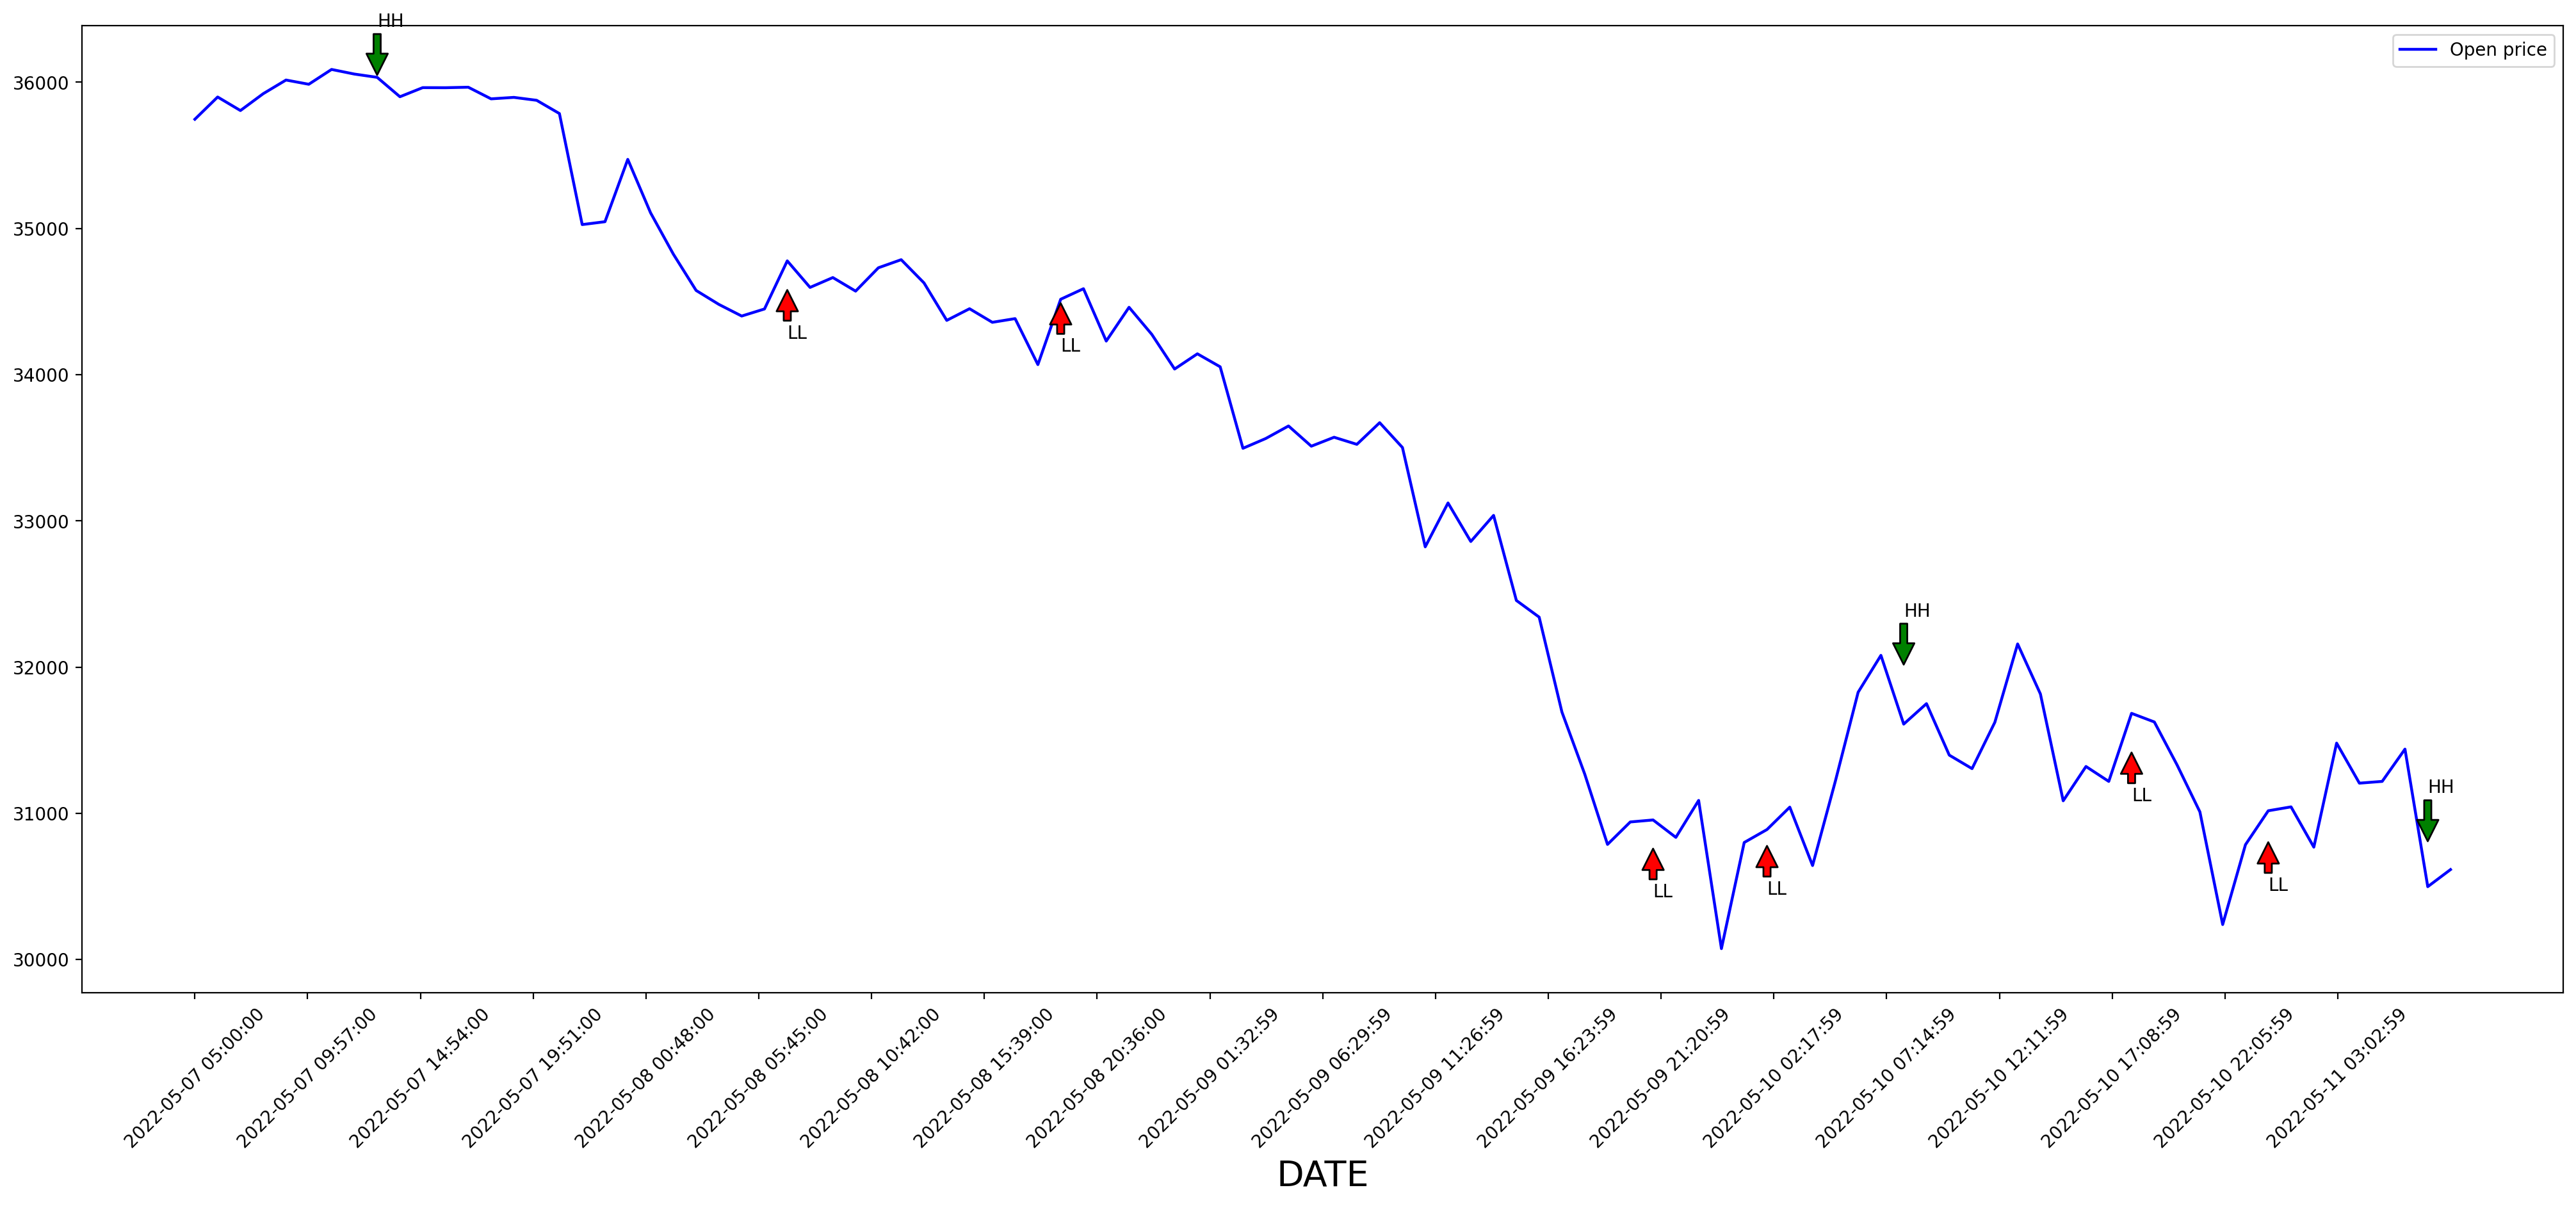

In [19]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
from datetime import datetime

data_p = data_c[-100:]

fig_size = 200
fig = plt.figure(figsize=(25, 10), dpi=fig_size)

gs = gridspec.GridSpec(8, 1, wspace=0.00, hspace=0.00)  # 7x1 grid
ax = fig.add_subplot(gs[0:, 0])  # first row

data_p.plot(lw=1.6, x='o_date', y='Open', color='blue', kind='line', ax=ax, label='Open price')
# data_p.plot(lw=1.6, x='o_date', y='Close', color='green', kind='line', ax=ax, label='Close price')
g_time = data_p["o_date"].iloc[-1] - data_p["o_date"].iloc[0]
date_space = g_time / fig_size * 10
ax.xaxis.set_ticks(np.arange(data_p["o_date"].iloc[0], data_p["o_date"].iloc[-1], date_space))

ax.set_xlabel('DATE', fontsize=20)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
ax.tick_params(axis='x', labelrotation=45)

### place HH, HL, LH, LL annotation
y_start, y_end = ax.get_ylim()
y_range = y_end - y_start

for index in data_p.index:
    ac_date = data_p['o_date'][index]
    if data_p['HH'][index]:
        text = 'HH'
        color = 'g'
        offset = (y_range / 20)
        y = data_p['High'][index]
    elif data_p['LL'][index]:
        text = 'LL'
        color = 'r'
        offset = -(y_range / 20)
        y = data_p['Low'][index]
    if data_p['HH'][index] or data_p['LL'][index]:
        pass
        ax.annotate('{}'.format(text),
                    xy=(ac_date, y),
                    xytext=(ac_date, y + offset),
                    arrowprops=dict(facecolor=color, shrink=10))